In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# datasets

df = pd.read_csv("IceaCreamFrozenDessert.csv")

In [3]:
df.head()

,DATE,value
0,01/01/1972,59.9622
1,01/02/1972,67.0605
2,01/03/1972,74.2350
3,01/04/1972,78.1120
4,01/05/1972,84.7636


In [4]:
# date and time to index


In [5]:
df = pd.read_csv("IceaCreamFrozenDessert.csv")

In [6]:
df.head()

,DATE,value
0,01/01/1972,59.9622
1,01/02/1972,67.0605
2,01/03/1972,74.2350
3,01/04/1972,78.1120
4,01/05/1972,84.7636


In [7]:
df["DATE"] = pd.to_datetime(df["DATE"].astype(str), format='%d/%m/%Y').dt.strftime('%Y/%m/%d')

In [8]:
# reset the index to date and time as we seen in before tutorial

df.reset_index(inplace = True)
df.set_index("DATE",drop=False, inplace=True)
df.drop(["index","DATE"], axis = 1, inplace = True)

In [9]:
df.head()

,value
DATE,
1972/01/01,59.9622
1972/02/01,67.0605
1972/03/01,74.2350
1972/04/01,78.1120
1972/05/01,84.7636


In [10]:
# visualization of data

<AxesSubplot:xlabel='DATE'>

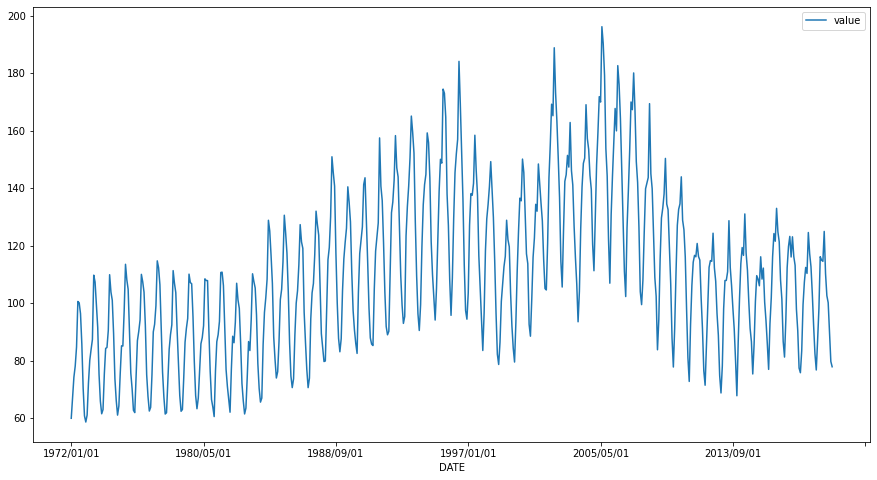

In [11]:
df.plot(figsize = (15,8))

<AxesSubplot:xlabel='DATE'>

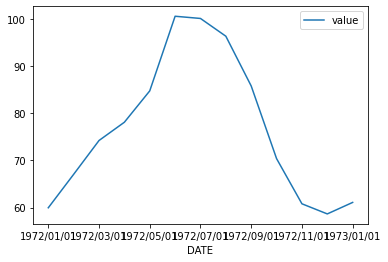

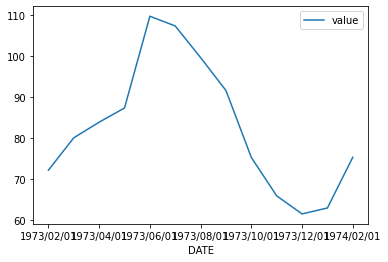

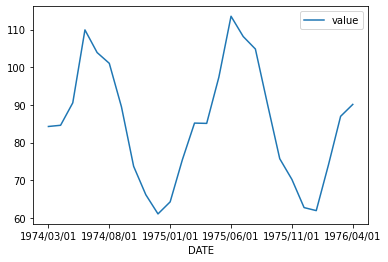

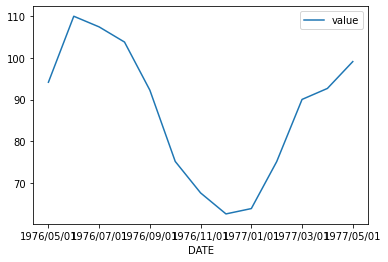

In [12]:

df[:13].plot()
df[13:26].plot()
df[26:52].plot()
df[52:65].plot()

In [13]:
# based on that predict for

In [14]:
len(df)

576

In [15]:
test_size = 24

test_point = len(df)-24

In [16]:
train = df[:test_point]
test = df[test_point:]

In [17]:
train.shape, test.shape, df.shape

((552, 1), (24, 1), (576, 1))

In [18]:
# scaling the data

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
train_scaled = scaler.fit_transform(train)

In [22]:
test_scaled = scaler.transform(test)

In [23]:
train_scaled.min(), test_scaled.max()

(0.0, 0.48213816930506653)

In [24]:
# generator

In [25]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [26]:
length = 12  # months = 12
batch_size = 1

generator = TimeseriesGenerator(
                            train_scaled, train_scaled, length = length, batch_size= batch_size
)

In [27]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [28]:
train_scaled[:length+1]

array([[0.00947104],
       [0.06108982],
       [0.11326273],
       [0.14145625],
       [0.18982663],
       [0.30495972],
       [0.30154406],
       [0.27416065],
       [0.19736841],
       [0.08532665],
       [0.01561588],
       [0.        ],
       [0.01774221]])

In [29]:
# model creation

In [30]:
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
n_feature = 1

model = Sequential([
    LSTM(150, activation = "relu", input_shape = (length, n_feature))
])

model.add(Dense(1))

In [32]:
model.compile(
    optimizer= "adam",
    loss = "mse"
)

In [33]:
# callbacks

early = EarlyStopping( monitor="val_loss", patience=3)

In [34]:
validation_generator = TimeseriesGenerator(
                        test_scaled, test_scaled, length = length, batch_size= batch_size
)

In [35]:
Model = model.fit_generator( generator,epochs = 38, validation_data= validation_generator, callbacks=[early])

C:\Users\jawah\anaconda3\envs\py37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/38
540/540 [==============================] - 9s 10ms/step - loss: 0.0389 - val_loss: 0.0022
Epoch 2/38
540/540 [==============================] - 5s 8ms/step - loss: 0.0063 - val_loss: 0.0026
Epoch 3/38
540/540 [==============================] - 5s 10ms/step - loss: 0.0059 - val_loss: 0.0070
Epoch 4/38
540/540 [==============================] - 5s 8ms/step - loss: 0.0061 - val_loss: 0.0022


<AxesSubplot:>

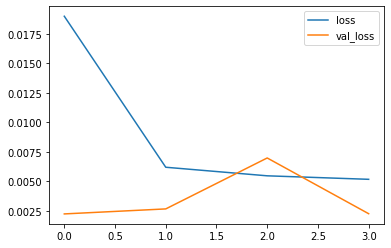

In [36]:
pd.DataFrame(Model.history).plot()

In [37]:
# using previous lecture code for the evaluation

In [38]:
# now, with for loop

test_prediction = []

first_test_batch = train_scaled[-length:]

# reshape
current_batch = first_test_batch.reshape(1,length, n_feature)

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_prediction.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

In [39]:
true_prediction = scaler.inverse_transform(test_prediction)

In [40]:
test["prediction"] = true_prediction

C:\Users\jawah\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
test.head()

,value,prediction
DATE,,
2018/01/01,83.4343,89.040481
2018/02/01,99.4899,101.859010
2018/03/01,107.3152,111.010820
2018/04/01,112.4309,115.750845
2018/05/01,110.3544,118.488437


<AxesSubplot:xlabel='DATE'>

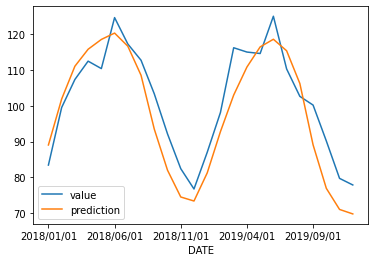

In [42]:
test.plot()

In [43]:
# now for full datasets

In [44]:
full_scaled = MinMaxScaler()

In [45]:
full_df_scaled = full_scaled.fit_transform(df)

In [46]:
# generator

In [47]:
generator = TimeseriesGenerator(
                    full_df_scaled, full_df_scaled, length = 12, batch_size= 1
)

In [48]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [49]:
# model creation

In [50]:
model = Sequential([
    LSTM( 150, activation = "relu", input_shape = (length, n_feature))
])
model.add(Dense(1))

In [51]:
model.compile(
    optimizer= "adam",
    loss = "mse"
)

In [52]:
Model2 = model.fit_generator(generator, epochs = 6)

C:\Users\jawah\anaconda3\envs\py37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/6
564/564 [==============================] - 9s 11ms/step - loss: 0.0345
Epoch 2/6
564/564 [==============================] - 6s 11ms/step - loss: 0.0093
Epoch 3/6
564/564 [==============================] - 7s 12ms/step - loss: 0.0057
Epoch 4/6
564/564 [==============================] - 7s 12ms/step - loss: 0.0048
Epoch 5/6
564/564 [==============================] - 7s 12ms/step - loss: 0.0039
Epoch 6/6
564/564 [==============================] - 7s 13ms/step - loss: 0.0044


<AxesSubplot:>

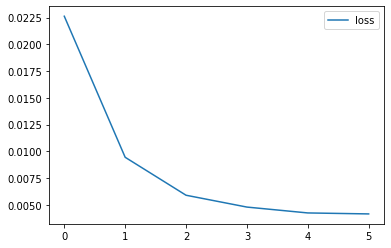

In [53]:
pd.DataFrame(Model2.history).plot()

In [54]:
# now, with for loop

test_prediction = []

first_test_batch = full_df_scaled[-length:]

# reshape
current_batch = first_test_batch.reshape(1,length, n_feature)

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_prediction.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

In [55]:
true_prediction = full_scaled.inverse_transform(test_prediction)

In [56]:
# creating a dataframe for prediction

In [57]:
# to add these value to the timestamp on df data

In [58]:
df.index

Index(['1972/01/01', '1972/02/01', '1972/03/01', '1972/04/01', '1972/05/01',
       '1972/06/01', '1972/07/01', '1972/08/01', '1972/09/01', '1972/10/01',
       ...
       '2019/03/01', '2019/04/01', '2019/05/01', '2019/06/01', '2019/07/01',
       '2019/08/01', '2019/09/01', '2019/10/01', '2019/11/01', '2019/12/01'],
      dtype='object', name='DATE', length=576)

In [59]:
forecast_index = pd.date_range(start = '2019-12-01',periods = 24 ,freq = "MS")

In [60]:
len(true_prediction), len(forecast_index)

(24, 24)

In [61]:
forecast_df = pd.DataFrame(data = true_prediction, index = forecast_index, columns = ["predictions"])

In [62]:
forecast_df.head()

,predictions
2019-12-01,89.829028
2020-01-01,103.456378
2020-02-01,115.134963
2020-03-01,120.458154
2020-04-01,126.504315


<AxesSubplot:>

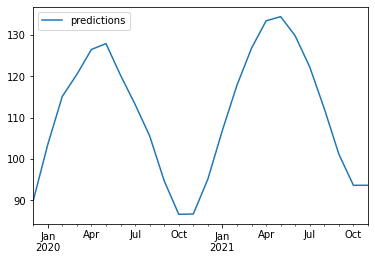

In [63]:
forecast_df.plot()

<AxesSubplot:xlabel='DATE'>

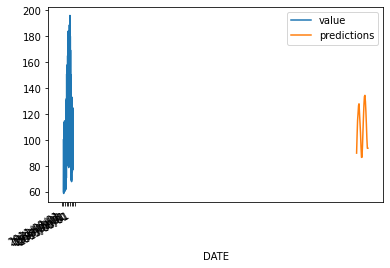

In [64]:
ax = df.plot()
forecast_df.plot(ax = ax)

In [65]:
forecast_df

,predictions
2019-12-01,89.829028
2020-01-01,103.456378
2020-02-01,115.134963
2020-03-01,120.458154
2020-04-01,126.504315
2020-05-01,127.919505
2020-06-01,120.253894
2020-07-01,113.202584
2020-08-01,105.548998
2020-09-01,94.671085


(17532.0, 18628.0)

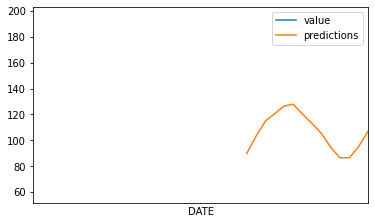

In [66]:
# same plot
# zoom in

ax = df.plot()
forecast_df.plot(ax = ax)

plt.xlim("2018-01-01","2021-01-01")

In [67]:
df

,value
DATE,
1972/01/01,59.9622
1972/02/01,67.0605
1972/03/01,74.2350
1972/04/01,78.1120
1972/05/01,84.7636
...,...
2019/08/01,102.6085
2019/09/01,100.1741
2019/10/01,90.1684


In [68]:
forecast_index

DatetimeIndex(['2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01'],
              dtype='datetime64[ns]', freq='MS')

In [69]:
df.index.dt.strftime('%m/%d/%Y')

AttributeError: 'Index' object has no attribute 'dt'